# Training notebook

This notebook is used to train neural-network models for all lattice sizes considered in

Carrasquilla, J., & Melko, R. G. (2017). Machine learning phases of matter. Nature Physics, 13(5), 431-434.

The sole purpose of this notebook is model training.
All evaluation, figure reproduction, and analysis are performed separately in `model_evaluation.ipynb`.

We train one model for each lattice size 
$$L\in\{10,20,30,40,60\},$$
following as closely as possible the setup described in the original paper.

In [1]:
import torch
from torch import nn
import utils, engine, helper_functions

## Define the computational device

The device on which all model training will run:
* `"cpu"` — standard CPU execution,
* `"cuda"` - NVIDIA GPU,
* `"mps"` - Apple Silicon GPU.

This notebook was prepared on `"mps"`.

In [1]:
device = "mps"

List with lattice sizes used for computation

In [3]:
lattice_sizes = [10, 20, 30, 40, 60]

## Training details

Our goal is to follow the description in the original paper as closely as possible. The original paper and Supplementary Information specify only a subset of the training procedure:

* **Loss function**: cross-entropy (explicitly stated in paper).
* **Optimizer**: Adam (explicitly stated in paper).
* **Regularization**: L2 (explicitly stated in paper) we implement it through `weight_decay` term in Adam optimizer, although its numerical value is not provided in the paper.
* **Activation functions**: sigmoid (explicitly stated in paper).
* **Batching**: not mentioned in paper; we therefore train on the full dataset each epoch.
* **Number of epochs**: not mentioned in paper; here we choose a sufficiently large value to ensure convergence.

Based on these constraints, we adopt the following choices:
* **Epochs**: 10,000.
* **Optimizer**: Adam with `weight_decay=1e-4` for L2 regularization and additional hyperparameter `eps = 1e-3` to avoid numerical instabilities observed for larger $L$. The `eps` hyperparameter was not mentioned in the paper, but it significantly improves training stability.
* 

Train models in a loop. Training details
* We train for 3000 epochs. Number of epochs was not provided in the paper. We believe that models can be refined by further training, but representative results should be achieved.
* Optimization algorithm Adam. Use `weight_decay=0.5e-4` for L2 regularization. This parameter is not provided in the paper.
* While using Adam, we provide hyperparameter `eps=1e-3` to avoid division by $0$ in weight updates. It resulted in massive improvement in training stability for $L=40$ and $L=60$.
* Data is not batched as the paper does not state it was done so.
* We use cross entropy loss as criterion.

Adam documentation:
https://docs.pytorch.org/docs/stable/generated/torch.optim.Adam.html

-------------------
L = 10 | Starting training ...
epoch: 0
Train loss: 0.694, test loss: 0.694
epoch: 500
Train loss: 0.552, test loss: 0.556
epoch: 1000
Train loss: 0.462, test loss: 0.467
epoch: 1500
Train loss: 0.428, test loss: 0.434
epoch: 2000
Train loss: 0.411, test loss: 0.417
epoch: 2500
Train loss: 0.401, test loss: 0.408
epoch: 3000
Train loss: 0.395, test loss: 0.401
epoch: 3500
Train loss: 0.390, test loss: 0.397
epoch: 4000
Train loss: 0.387, test loss: 0.394
epoch: 4500
Train loss: 0.384, test loss: 0.392
epoch: 5000
Train loss: 0.382, test loss: 0.390
epoch: 5500
Train loss: 0.381, test loss: 0.389
epoch: 6000
Train loss: 0.380, test loss: 0.388
epoch: 6500
Train loss: 0.379, test loss: 0.387
epoch: 7000
Train loss: 0.378, test loss: 0.386
epoch: 7500
Train loss: 0.377, test loss: 0.385
epoch: 8000
Train loss: 0.377, test loss: 0.385
epoch: 8500
Train loss: 0.376, test loss: 0.384
epoch: 9000
Train loss: 0.376, test loss: 0.384
epoch: 9500
Train loss: 0.375, test loss:

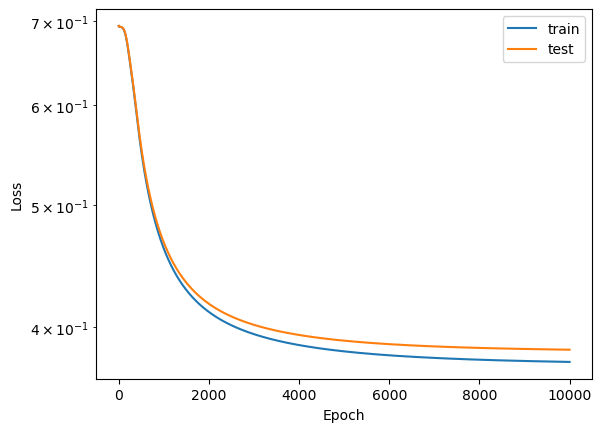

-------------------
L = 20 | Starting training ...
epoch: 0
Train loss: 0.694, test loss: 0.694
epoch: 500
Train loss: 0.526, test loss: 0.532
epoch: 1000
Train loss: 0.432, test loss: 0.439
epoch: 1500
Train loss: 0.388, test loss: 0.396
epoch: 2000
Train loss: 0.367, test loss: 0.376
epoch: 2500
Train loss: 0.356, test loss: 0.366
epoch: 3000
Train loss: 0.350, test loss: 0.360
epoch: 3500
Train loss: 0.346, test loss: 0.357
epoch: 4000
Train loss: 0.344, test loss: 0.355
epoch: 4500
Train loss: 0.342, test loss: 0.354
epoch: 5000
Train loss: 0.341, test loss: 0.353
epoch: 5500
Train loss: 0.340, test loss: 0.353
epoch: 6000
Train loss: 0.340, test loss: 0.352
epoch: 6500
Train loss: 0.339, test loss: 0.352
epoch: 7000
Train loss: 0.339, test loss: 0.352
epoch: 7500
Train loss: 0.338, test loss: 0.351
epoch: 8000
Train loss: 0.338, test loss: 0.351
epoch: 8500
Train loss: 0.338, test loss: 0.351
epoch: 9000
Train loss: 0.337, test loss: 0.351
epoch: 9500
Train loss: 0.337, test loss:

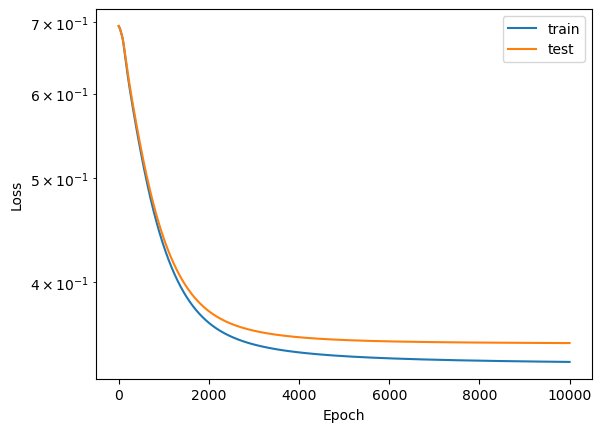

-------------------
L = 30 | Starting training ...
epoch: 0
Train loss: 0.694, test loss: 0.694
epoch: 500
Train loss: 0.489, test loss: 0.496
epoch: 1000
Train loss: 0.397, test loss: 0.407
epoch: 1500
Train loss: 0.359, test loss: 0.371
epoch: 2000
Train loss: 0.344, test loss: 0.357
epoch: 2500
Train loss: 0.337, test loss: 0.351
epoch: 3000
Train loss: 0.333, test loss: 0.347
epoch: 3500
Train loss: 0.331, test loss: 0.345
epoch: 4000
Train loss: 0.329, test loss: 0.344
epoch: 4500
Train loss: 0.328, test loss: 0.343
epoch: 5000
Train loss: 0.327, test loss: 0.343
epoch: 5500
Train loss: 0.326, test loss: 0.343
epoch: 6000
Train loss: 0.326, test loss: 0.342
epoch: 6500
Train loss: 0.325, test loss: 0.342
epoch: 7000
Train loss: 0.325, test loss: 0.342
epoch: 7500
Train loss: 0.325, test loss: 0.342
epoch: 8000
Train loss: 0.324, test loss: 0.342
epoch: 8500
Train loss: 0.324, test loss: 0.341
epoch: 9000
Train loss: 0.324, test loss: 0.341
epoch: 9500
Train loss: 0.324, test loss:

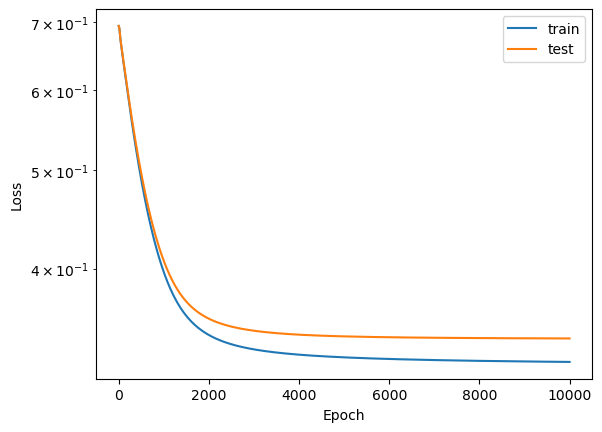

-------------------
L = 40 | Starting training ...
epoch: 0
Train loss: 0.693, test loss: 0.693
epoch: 500
Train loss: 0.514, test loss: 0.520
epoch: 1000
Train loss: 0.407, test loss: 0.417
epoch: 1500
Train loss: 0.360, test loss: 0.372
epoch: 2000
Train loss: 0.342, test loss: 0.355
epoch: 2500
Train loss: 0.334, test loss: 0.347
epoch: 3000
Train loss: 0.329, test loss: 0.343
epoch: 3500
Train loss: 0.327, test loss: 0.341
epoch: 4000
Train loss: 0.325, test loss: 0.339
epoch: 4500
Train loss: 0.324, test loss: 0.338
epoch: 5000
Train loss: 0.323, test loss: 0.338
epoch: 5500
Train loss: 0.322, test loss: 0.337
epoch: 6000
Train loss: 0.321, test loss: 0.337
epoch: 6500
Train loss: 0.321, test loss: 0.336
epoch: 7000
Train loss: 0.321, test loss: 0.336
epoch: 7500
Train loss: 0.320, test loss: 0.336
epoch: 8000
Train loss: 0.320, test loss: 0.336
epoch: 8500
Train loss: 0.320, test loss: 0.335
epoch: 9000
Train loss: 0.320, test loss: 0.335
epoch: 9500
Train loss: 0.319, test loss:

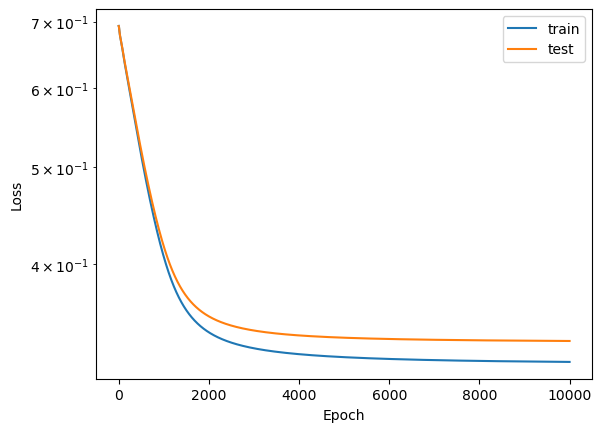

-------------------
L = 60 | Starting training ...
epoch: 0
Train loss: 0.695, test loss: 0.695
epoch: 500
Train loss: 0.508, test loss: 0.514
epoch: 1000
Train loss: 0.396, test loss: 0.408
epoch: 1500
Train loss: 0.353, test loss: 0.367
epoch: 2000
Train loss: 0.337, test loss: 0.352
epoch: 2500
Train loss: 0.330, test loss: 0.345
epoch: 3000
Train loss: 0.326, test loss: 0.342
epoch: 3500
Train loss: 0.323, test loss: 0.340
epoch: 4000
Train loss: 0.322, test loss: 0.338
epoch: 4500
Train loss: 0.321, test loss: 0.337
epoch: 5000
Train loss: 0.320, test loss: 0.336
epoch: 5500
Train loss: 0.319, test loss: 0.336
epoch: 6000
Train loss: 0.319, test loss: 0.335
epoch: 6500
Train loss: 0.318, test loss: 0.335
epoch: 7000
Train loss: 0.318, test loss: 0.334
epoch: 7500
Train loss: 0.318, test loss: 0.334
epoch: 8000
Train loss: 0.317, test loss: 0.334
epoch: 8500
Train loss: 0.317, test loss: 0.334
epoch: 9000
Train loss: 0.317, test loss: 0.333
epoch: 9500
Train loss: 0.317, test loss:

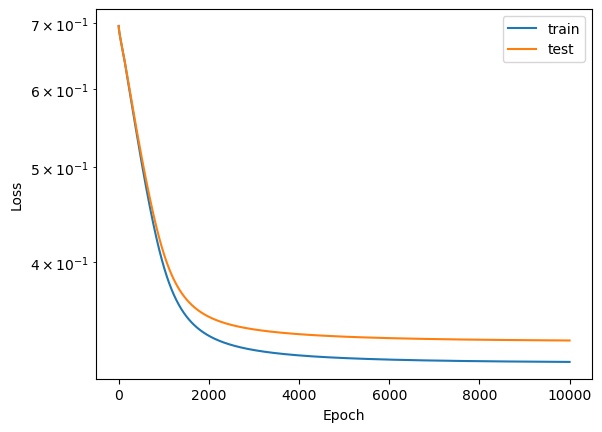

In [5]:
EPOCHS = 10000

# To ensure reproducibility
torch.manual_seed(71)

for L in lattice_sizes:
    # Load data
    Xtrain, Xtest, ytrain, ytest, temperatures = utils.get_data(L, "data", device = device)

    # Create model to train
    model = nn.Sequential(
        nn.Linear(L**2,100),
        nn.Sigmoid(),
        nn.Linear(100,2),
        nn.Sigmoid()
    ).to(device)

    # Train model
    print("-------------------")
    print(f"{L = } | Starting training ...")
    engine.train_model(model, Xtrain, ytrain, Xtest, ytest, EPOCHS,
                       savedir="models", filename= f"L={L}")

***